In [1]:
# Semi-Automatic Annotation Methods

### 0.1 Configure notebook

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # Import the 3D plotting module
import random
    
performer_name = "Daniel"
hand = "L"
gloss = 'wander/'
path = 'data/HE_raw_data/' + gloss
selected_cols = [
    "Timecode(device)", "Timer(device)", "Timecode(master)", "hand_x", "hand_y", "hand_z",
    "index_00_x", "index_00_y", "index_00_z",
    "index_01_x", "index_01_y", "index_01_z",
    "index_02_x", "index_02_y", "index_02_z",
    "index_03_x", "index_03_y", "index_03_z",
    "middle_00_x", "middle_00_y", "middle_00_z",
    "middle_01_x", "middle_01_y", "middle_01_z",
    "middle_02_x", "middle_02_y", "middle_02_z",
    "middle_03_x", "middle_03_y", "middle_03_z",
    "pinky_00_x", "pinky_00_y", "pinky_00_z",
    "pinky_01_x", "pinky_01_y", "pinky_01_z",
    "pinky_02_x", "pinky_02_y", "pinky_02_z",
    "pinky_03_x", "pinky_03_y", "pinky_03_z",
    "ring_00_x", "ring_00_y", "ring_00_z",
    "ring_01_x", "ring_01_y", "ring_01_z",
    "ring_02_x", "ring_02_y", "ring_02_z",
    "ring_03_x", "ring_03_y", "ring_03_z",
    "thumb_01_x", "thumb_01_y", "thumb_01_z",
    "thumb_02_x", "thumb_02_y", "thumb_02_z",
    "thumb_03_x", "thumb_03_y", "thumb_03_z"
    ]

In [3]:
# Read calibration data
calibration = pd.read_json('data/ASL_calibration.json')
calibration.head()

,name,joints,libraries
0,1,"[90, -5, 90, -6, 6, 0, 0, -7, 0, 0, 0, 0, 0, 0...","[ASL Phonetics, Custom Poses, , ]"
1,open_b,"[90, -5, 90, -6, 6, 0, 0, -8, 0, 0, 0, 0, 0, 0...","[ASL Phonetics, Custom Poses, , ]"
2,5,"[90, -5, 90, -6, 6, 0, 0, 11, 0, 0, 0, 0, 0, 0...","[ASL Phonetics, Custom Poses, , ]"
3,a,"[90, -5, 90, -6, 6, -10, 0, -8, 95, 0, 0, 100,...","[ASL Phonetics, Custom Poses, , ]"
4,c,"[90, -5, 90, -6, 6, -10, 0, -8, 43, 0, 0, 40, ...","[ASL Phonetics, Custom Poses, ]"


In [7]:
# Read calibration data
semlex = pd.read_csv('data/semlex.csv')
semlex['spectrum'] = 0
semlex.head()

,label,video_id,Handshape,Count,spectrum
0,puzzled,wizgnGaiIZDxjUBswgTE,1,112,0
1,example,OjJfz2v3RMsK5akClwfp,1,112,0
2,discuss,3byTUKxY0AQS5Swe875V,1,112,0
3,suspect,9zzypWA4entDW70SZqMn,1,112,0
4,tell,krf2vqF7COKTLAeGB2FM,1,112,0


In [8]:
def load_sample(path, file, selected_cols):

    df = pd.read_csv(path + file)
    df.columns = df.columns.str.replace(' ', '')
    df_timecodes = df[selected_cols[0:3]]
    df = df[selected_cols[6:]]
    return df, df_timecodes

df, df_timecodes = load_sample(path, "P1L_Daniel.csv", selected_cols)

In [9]:
df

,index_00_x,index_00_y,index_00_z,index_01_x,index_01_y,index_01_z,index_02_x,index_02_y,index_02_z,index_03_x,...,ring_03_z,thumb_01_x,thumb_01_y,thumb_01_z,thumb_02_x,thumb_02_y,thumb_02_z,thumb_03_x,thumb_03_y,thumb_03_z
0,0.851732,3.955695,1.400341,-5.063880,9.784618,12.686057,-7.060369e-17,6.246347e-16,23.972130,-7.356549e-16,...,11.592746,98.814669,6.474089,19.979986,-3.405721e-15,-1.719238,11.014056,7.946004e-16,-2.925177e-17,4.216576
1,0.851656,3.955699,1.400377,-5.063916,9.784409,12.685448,3.769544e-16,-1.096096e-15,23.970679,-8.539434e-16,...,11.595014,98.828766,6.468141,19.985009,1.516416e-15,-1.719440,11.014543,-2.394770e-16,1.600169e-15,4.216194
2,0.841530,3.956223,1.403098,-5.064929,9.757511,12.664975,6.443398e-16,-1.761162e-15,23.819602,3.245583e-17,...,11.582119,99.259350,6.578577,19.952393,-4.151485e-15,-1.712790,11.134067,3.575649e-15,-1.330513e-16,4.262029
3,0.839939,3.956305,1.402088,-5.064024,9.748729,12.678173,-8.707367e-16,-1.238429e-15,23.824735,7.653457e-16,...,11.574526,99.198714,6.589522,19.926349,1.300136e-14,-1.712751,11.140752,-4.906959e-15,1.774212e-15,4.267662
4,0.839410,3.956333,1.402878,-5.064431,9.749240,12.671702,5.940602e-16,8.905265e-16,23.810791,-7.783541e-16,...,11.574553,99.205973,6.582221,19.931377,7.507476e-15,-1.712999,11.138795,1.251067e-15,1.544786e-15,4.265749
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
405,0.460736,3.975978,2.887730,-5.679209,9.695234,1.086222,-3.552305e-16,1.242310e-15,13.324657,-3.959057e-16,...,16.368495,101.845940,18.575388,17.853652,-1.289903e-14,-1.209700,13.867635,-1.006226e-14,-3.963504e-16,4.546244
406,0.461549,3.975936,2.887113,-5.679105,9.671518,1.081773,2.551941e-16,4.704915e-16,13.347893,7.951096e-16,...,16.329457,101.770372,18.597865,17.825138,1.173091e-14,-1.208853,13.861054,-3.475994e-15,1.379767e-16,4.546229
407,0.465222,3.975745,2.884231,-5.678207,9.664254,1.100262,4.064736e-16,5.214785e-17,13.451025,3.932109e-16,...,16.322577,101.810979,18.565033,17.850036,7.679772e-15,-1.210638,13.858543,-2.333886e-15,9.255002e-17,4.541738
408,0.467009,3.975652,2.882597,-5.677766,9.646232,1.105190,-4.882675e-16,-7.429009e-16,13.499292,1.061919e-17,...,16.229868,101.749356,18.585104,17.816472,1.220313e-14,-1.209011,13.847773,-1.372247e-15,-7.413513e-16,4.541391


In [11]:
import os
import fnmatch
import json 
import re 
    
def build_spectra(directory, hand='L', permformer = 'Daniel'):
    """
    Searches through the given directory and its subdirectories,
    opening the first two files found in each subdirectory.
    """
    pattern = 'P1'+hand+'_*.csv'
    pattern_meta = 'P1'+hand+'_*Meta.json'
    performer_pattern = r'"performerName":\s*"(.+?)"'

    subdirectories = [os.path.join(directory, d) for d in os.listdir(directory) if os.path.isdir(os.path.join(directory, d))]
    glosses = []
    for subdir in subdirectories:
        # Get all files in the current subdirectory
        files = [f for f in os.listdir(subdir) if os.path.isfile(os.path.join(subdir, f))]
        data_file = [f for f in os.listdir(subdir) if fnmatch.fnmatch(f, pattern)]
        metadata_file = [f for f in os.listdir(subdir) if fnmatch.fnmatch(f, pattern_meta)]
        metapath = os.path.join(subdir, metadata_file[0])
        with open(metapath, 'r') as file:
            lines = file.readlines()  # Read all lines into a list
            # Access line 7 (note: lists are 0-indexed, so line 7 is at index 6)
            line_7 = lines[6].strip()
            match = re.search(performer_pattern, line_7)
            name = match.group(1)
            
            if name == permformer:
                glosses.append(subdir[17:])
                df, df_timecodes = load_sample(path, data_file[0], selected_cols)   
                exit()
                # Do the fourier caluclations                 

build_spectra('data/HE_raw_data/')

IndexError: list index out of range

: 

In [ ]:
len('data/HE_raw_data/')

17

In [10]:
def build_reference(col_names, pose_name = '1'):
    pose1 = calibration[calibration['name'] == pose_name].iloc[0]
    joint_values = pose1['joints'][3:]
    df_pose = pd.DataFrame([joint_values], columns=col_names)
    return df_pose

df_pose1 = build_reference(list(df.keys()))
df_pose1

,index_00_x,index_00_y,index_00_z,index_01_x,index_01_y,index_01_z,index_02_x,index_02_y,index_02_z,index_03_x,...,ring_03_z,thumb_01_x,thumb_01_y,thumb_01_z,thumb_02_x,thumb_02_y,thumb_02_z,thumb_03_x,thumb_03_y,thumb_03_z
0,-6,6,0,0,-7,0,0,0,0,0,...,90,0,3,36,0,0,50,0,0,13


In [ ]:
print('Strechsense data available: ', list(df.columns))
print('Number of frames: ', df.shape[0])
df.head()

Strechsense data available:  ['index_00_x', 'index_00_y', 'index_00_z', 'index_01_x', 'index_01_y', 'index_01_z', 'index_02_x', 'index_02_y', 'index_02_z', 'index_03_x', 'index_03_y', 'index_03_z', 'middle_00_x', 'middle_00_y', 'middle_00_z', 'middle_01_x', 'middle_01_y', 'middle_01_z', 'middle_02_x', 'middle_02_y', 'middle_02_z', 'middle_03_x', 'middle_03_y', 'middle_03_z', 'pinky_00_x', 'pinky_00_y', 'pinky_00_z', 'pinky_01_x', 'pinky_01_y', 'pinky_01_z', 'pinky_02_x', 'pinky_02_y', 'pinky_02_z', 'pinky_03_x', 'pinky_03_y', 'pinky_03_z', 'ring_00_x', 'ring_00_y', 'ring_00_z', 'ring_01_x', 'ring_01_y', 'ring_01_z', 'ring_02_x', 'ring_02_y', 'ring_02_z', 'ring_03_x', 'ring_03_y', 'ring_03_z', 'thumb_01_x', 'thumb_01_y', 'thumb_01_z', 'thumb_02_x', 'thumb_02_y', 'thumb_02_z', 'thumb_03_x', 'thumb_03_y', 'thumb_03_z']
Number of frames:  410


,index_00_x,index_00_y,index_00_z,index_01_x,index_01_y,index_01_z,index_02_x,index_02_y,index_02_z,index_03_x,...,ring_03_z,thumb_01_x,thumb_01_y,thumb_01_z,thumb_02_x,thumb_02_y,thumb_02_z,thumb_03_x,thumb_03_y,thumb_03_z
0,0.851732,3.955695,1.400341,-5.063880,9.784618,12.686057,-7.060369e-17,6.246347e-16,23.972130,-7.356549e-16,...,11.592746,98.814669,6.474089,19.979986,-3.405721e-15,-1.719238,11.014056,7.946004e-16,-2.925177e-17,4.216576
1,0.851656,3.955699,1.400377,-5.063916,9.784409,12.685448,3.769544e-16,-1.096096e-15,23.970679,-8.539434e-16,...,11.595014,98.828766,6.468141,19.985009,1.516416e-15,-1.719440,11.014543,-2.394770e-16,1.600169e-15,4.216194
2,0.841530,3.956223,1.403098,-5.064929,9.757511,12.664975,6.443398e-16,-1.761162e-15,23.819602,3.245583e-17,...,11.582119,99.259350,6.578577,19.952393,-4.151485e-15,-1.712790,11.134067,3.575649e-15,-1.330513e-16,4.262029
3,0.839939,3.956305,1.402088,-5.064024,9.748729,12.678173,-8.707367e-16,-1.238429e-15,23.824735,7.653457e-16,...,11.574526,99.198714,6.589522,19.926349,1.300136e-14,-1.712751,11.140752,-4.906959e-15,1.774212e-15,4.267662
4,0.839410,3.956333,1.402878,-5.064431,9.749240,12.671702,5.940602e-16,8.905265e-16,23.810791,-7.783541e-16,...,11.574553,99.205973,6.582221,19.931377,7.507476e-15,-1.712999,11.138795,1.251067e-15,1.544786e-15,4.265749


In [ ]:
df_timecodes

,Timecode(device),Timer(device),Timecode(master)
0,61200061,7724316,06:12:00:023
1,61200062,7724324,06:12:00:023
2,61200093,7724583,06:12:00:023
3,61200113,7724749,06:12:00:023
4,61200114,7724758,06:12:00:023
...,...,...,...
405,61204037,7728099,06:12:04:008
406,61204038,7728108,06:12:04:008
407,61204039,7728116,06:12:04:008
408,61204040,7728124,06:12:04:008


In [11]:
# Predefined colors in matplotlib
#all_colors = list(plt.cm.colors.cnames.keys())
#random.seed(0)  # For reproducible color output
#colors = random.sample(all_colors, df.shape[1])
#list(colors)

colors = ['mistyrose',
 'orchid',
 'blueviolet',
 'lemonchiffon',
 'skyblue',
 'salmon',
 'olive',
 'lightskyblue',
 'royalblue',
 'mediumseagreen',
 'greenyellow',
 'silver',
 'darkslateblue',
 'lightgreen',
 'springgreen',
 'darkgray',
 'lavenderblush',
 'darkslategrey',
 'lightslategrey',
 'darkgreen',
 'cornsilk',
 'pink',
 'palegoldenrod',
 'mediumaquamarine',
 'dimgray',
 'indigo',
 'lightgray',
 'burlywood',
 'firebrick',
 'tan',
 'deeppink',
 'lightslategray',
 'lightyellow',
 'darkgrey',
 'lightgoldenrodyellow',
 'ivory',
 'grey',
 'paleturquoise',
 'white',
 'darksalmon',
 'black',
 'turquoise',
 'peachpuff',
 'antiquewhite']

In [12]:
print(len(colors))

44


In [13]:
len(list(df_pose1.values[0]))

57

IndexError: list index out of range

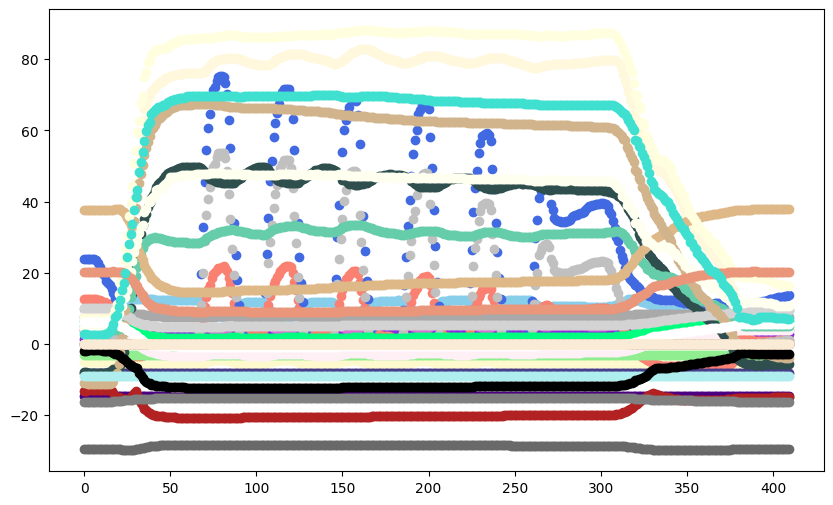

In [14]:
# Plot time evolution of each measurements
plt.figure(figsize=(10, 6))

for i, column in enumerate(df.columns):
    plt.scatter(df.index, df[column], color=colors[i], label=column)
for i, column in enumerate(df.columns):
    plt.scatter(370, df_pose1.values[0][i], color=colors[i], edgecolors='k')

df_pose1.values
plt.title('Time evolution of measurements')
plt.xlabel('Index')
plt.ylabel('Values')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), ncol=round(len(df.columns)/10))

plt.show()

410
410


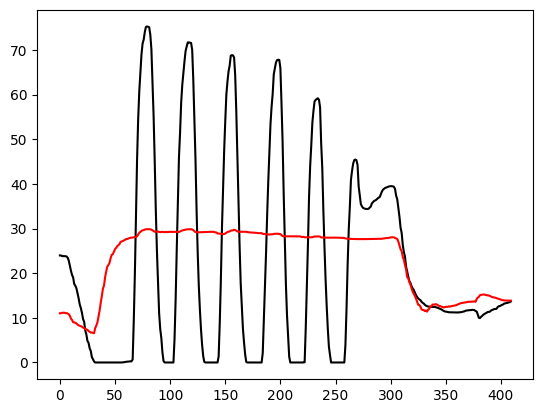

In [15]:
signal_main = df['index_02_z']
signal_base = df['thumb_02_z']

plt.plot(df['index_02_z'], color='black', label='Pose 1')
plt.plot(df['thumb_02_z'], color='red', label='Pose 1')

print(len(signal_main))
print(len(signal_base))

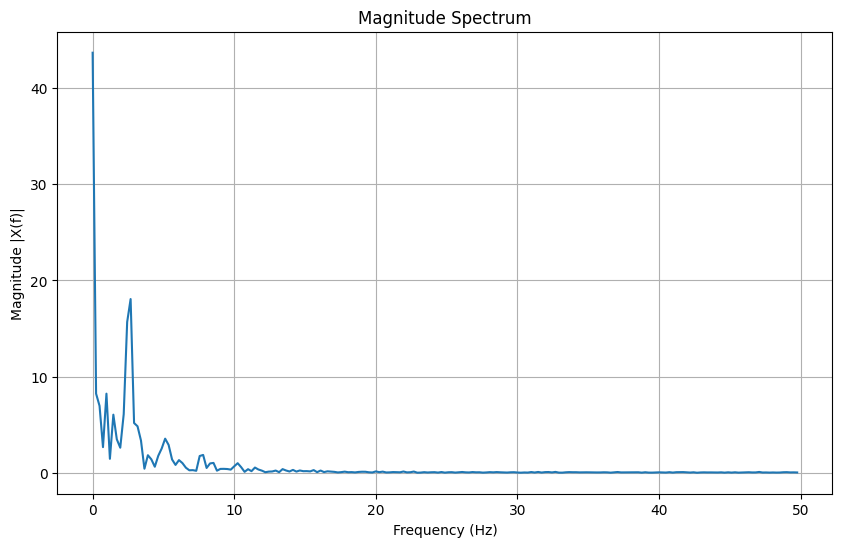

In [ ]:
def compute_signal(signal):
    signal_fft = np.fft.fft(signal)
    n = len(signal)  # Length of the signal
    fs = 100
    frequencies = np.fft.fftfreq(n, d=1/fs)
    return signal_fft, frequencies

def plot_signal(signal):
    signal_fft, frequencies = compute_signal(signal)

    # Only plot the first half of frequencies, as the second half is the mirror image
    half_n = len(signal) // 2

    # Plotting the magnitude spectrum
    plt.figure(figsize=(10, 6))
    plt.plot(frequencies[:half_n], np.abs(signal_fft)[:half_n] * 2 / n)  # Normalize amplitude
    plt.title('Magnitude Spectrum')
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Magnitude |X(f)|')
    plt.grid(True)
    plt.show()

plot_signal(signal_main)

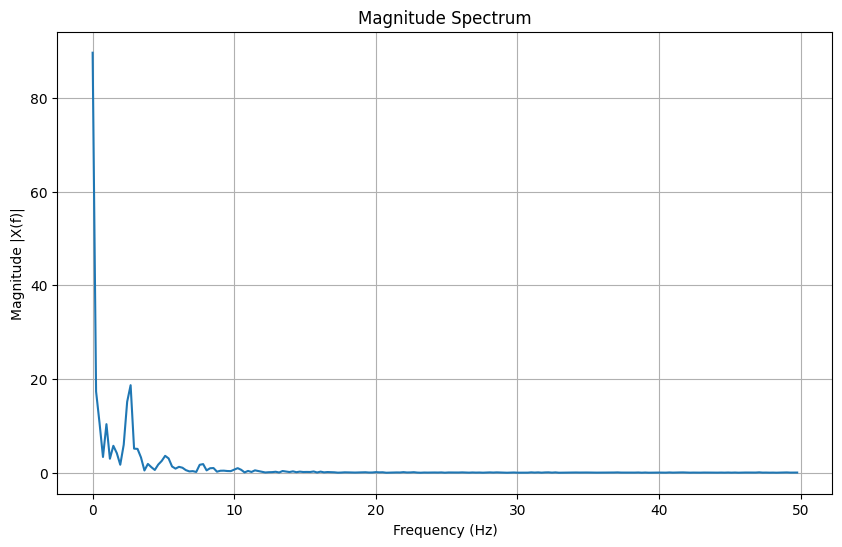

In [ ]:
plot_signal(signal_base + signal_main)

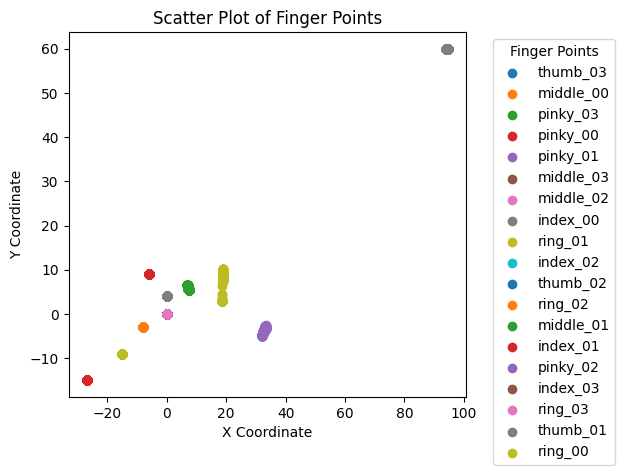

In [ ]:
finger_points = set('_'.join(col.split('_')[:2]) for col in df.columns if col.endswith('_x') or col.endswith('_y'))

# Plot x and y for each finger-point combination
for fp in finger_points:
    x_col = f'{fp}_x'
    y_col = f'{fp}_y'
    plt.scatter(df[x_col], df[y_col], label=fp)

plt.title('Scatter Plot of Finger Points')
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.legend(title='Finger Points', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [ ]:
print(len([90,-5,90,-6,6,0,0,-8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,12,-12,0,0,13,0,0,0,0,0,0,0,6,-6,0,0,6,0,0,0,0,0,0,0,0,44,0,0,0,0,0,0,0]))
print(len(df.keys()))

60
57


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('data/fourier.csv')
df

,gloss,spectrum,frequencies
0,rake,[3.99837675e+02 6.07657245e+01 1.31383637e+01 ...,[ 0. 0.22421525 0.44843049 0.67...
1,again,[3.42040979e+02 2.59593795e+01 1.57762684e+01 ...,[ 0. 0.37878788 0.75757576 1.13...
2,earn,[4.09624819e+02 9.98579132e+01 4.07501368e+01 ...,[ 0. 0.23809524 0.47619048 0.71...
3,black,[5.07260293e+02 1.25217372e+02 5.81429732e+01 ...,[ 0. 0.31948882 0.63897764 0.95...
4,inside,[4.11941181e+02 3.78710529e+01 8.79737001e+00 ...,[ 0. 0.24213075 0.4842615 0.72...
...,...,...,...
386,sound,[5.67258177e+02 8.61842549e+01 6.47415292e+01 ...,[ 0. 0.31746032 0.63492063 0.95...
387,clueless,[3.04382544e+02 1.85920647e+01 1.54581874e+01 ...,[ 0. 0.25 0.5 0.75 1. 1.25 1...
388,impossible,[5.20784956e+02 1.48737928e+02 3.85813594e+01 ...,[ 0. 0.28735632 0.57471264 0.86...
389,rude,[2.02459799e+02 3.41639341e+00 8.46631437e+00 ...,[ 0. 0.29069767 0.58139535 0.87...


In [28]:
import ast
def convert_to_list_s(dat):
    dat = dat.strip('][').split(' ')
    new_dat = []
    for item in dat:
        new_dat.append(float(item))
    return new_dat

def convert_to_list_f(dat):
    dat = dat.strip('][').split(' ')
    new_dat = []
    for item in dat:
        new_dat.append(float(item))
    return new_dat

for i in range(10):
    spectrum = convert_to_list_s(df.loc[i]['spectrum'])
    freq = convert_to_list_f(df.loc[i]['frequencies'])

    plt.plot(freq, spectrum)

ValueError: could not convert string to float: ''

In [13]:
df.loc[0]['spectrum'][0:1000]

'[3.99837675e+02 6.07657245e+01 1.31383637e+01 2.36751911e+01\n 4.67473273e+00 9.67592744e+00 8.29109267e+00 4.01747897e-01\n 5.83451846e+00 3.30215216e+00 1.54931138e+00 1.22513185e+00\n 1.36781869e+00 1.74096653e-01 1.85023433e+00 6.38213562e-01\n 2.56036952e-01 7.96189362e-01 8.29338543e-01 3.37747353e-01\n 4.31046772e-01 4.83615785e-01 6.85619602e-01 2.47513870e-01\n 4.32845566e-01 3.68853138e-02 3.41353559e-01 8.84342945e-02\n 4.03000715e-01 1.88158432e-01 2.02787675e-01 6.01286976e-02\n 1.88280318e-01 2.96406934e-01 1.36663148e-01 3.02510681e-01\n 3.10835404e-01 6.04849394e-02 1.84545361e-01 1.75510133e-01\n 1.68608246e-01 1.50275381e-01 2.53109488e-01 1.91881889e-01\n 2.10290229e-01 1.11685630e-01 1.43888217e-01 8.31206520e-02\n 1.57451292e-01 1.41577498e-01 1.71546837e-01 1.51091957e-01\n 1.60992745e-01 1.42778481e-01 1.41672098e-01 1.36378871e-01\n 1.50441328e-01 9.59213865e-02 9.71829633e-02 1.33040003e-01\n 1.11123355e-01 1.16216385e-01 1.24476724e-01 9.46040728e-02\n 6.3585